# Data Analysis Project - Boston House Prices Prediction

##資料分析專案 - 波士頓房價預測

In [ ]:
import time

EXECUTION_START_TIME = time.time() # 計算執行時間

In [ ]:
# 載入必要套件

from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error as MSE
import numpy as np
import pandas as pd

## 載入資料

In [ ]:
# 使用 scikit-learn 的資料

dataset = load_boston()
print(type(dataset))

<class 'sklearn.utils.Bunch'>


In [ ]:
# 觀察資料的 key 值有哪些

dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

## 資料前處理
 
將資料以 Pandas 整理成 DataFrame 的型式

欄位名稱為 feature_names

In [ ]:
df = pd.DataFrame(dataset.data,columns=dataset.feature_names)

In [ ]:
print("Number of features: ", len(dataset.feature_names))

Number of features:  13


In [ ]:
df['MEDV'] = dataset.target

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


統計各個 feature 的缺失值數目，可以發現沒有缺失值

In [ ]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

## 觀察資料的特性

藉由箱型圖(Boxplot)可以發現CRIM(城鎮的人均犯罪率), ZN(佔地25,000平方英尺以上的住宅區域比例), RM(每個住宅的平均房間數), B(城鎮的黑人比例)等欄位有較多離群值。

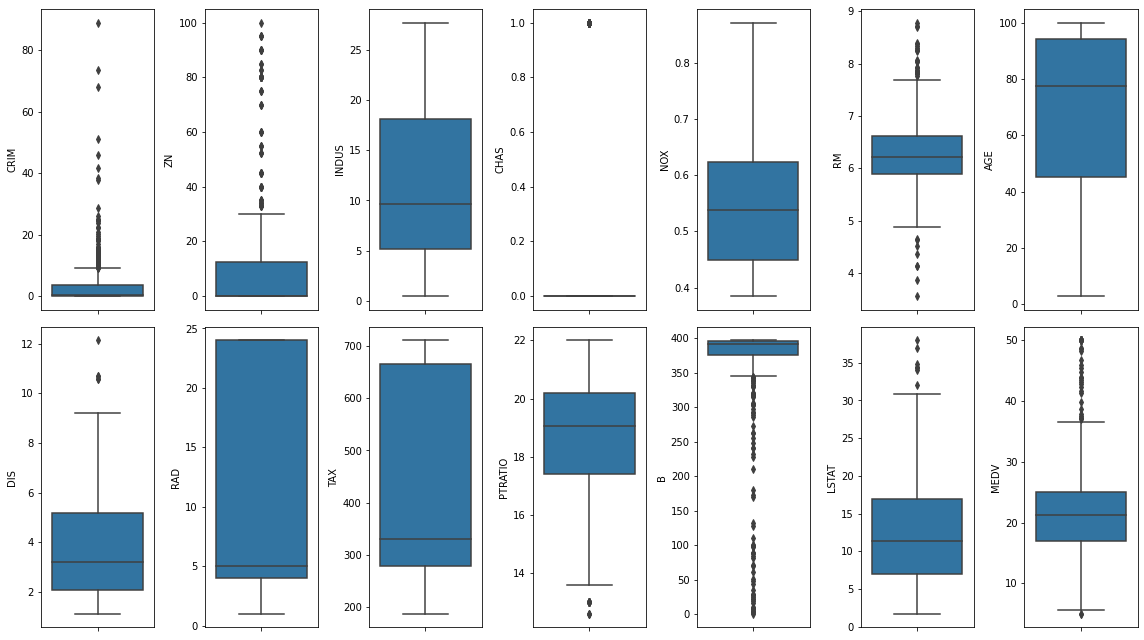

In [ ]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(16, 9))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout()

藉由熱圖(Heatmap)可以發現LSTAT(中下階級佔當地居住人口的比例)與MEDV(房價)的相關程度最高(r=-0.74)，其次是RM(每個住宅的平均房間數)/PTRATIO(城鎮的師生比例)(|r|>=0.5), INDUS(城鎮非零售業務地區的比例)/TAX(每10,000美元的所需繳的財產稅)/NOX(一氧化氮濃度)(|r|>=0.4)。

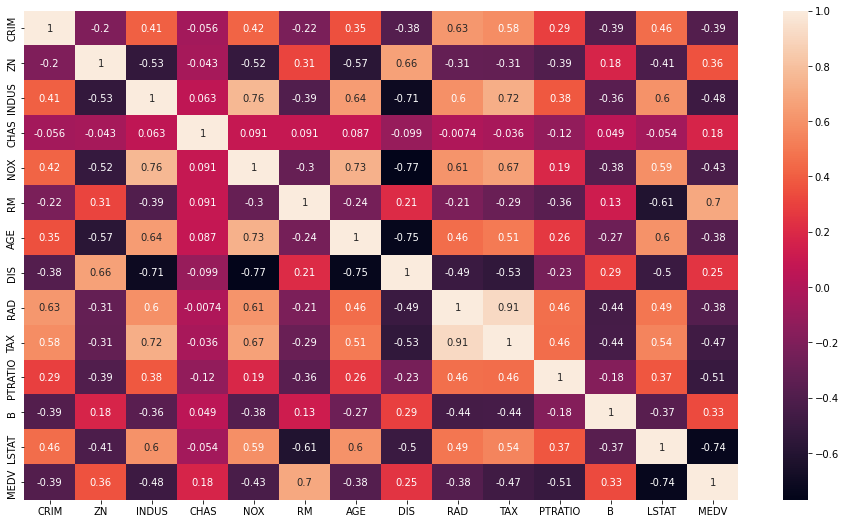

In [ ]:
plt.figure(figsize=(16, 9))
df_correlation=df.corr()
sns.heatmap(data=df_correlation, annot = True)

挑選出與MEDV(房價)的負相關程度最高的LSTAT(中下階級佔當地居住人口的比例，r=-0.74)與正相關程度最高的RM(每個住宅的平均房間數，r=0.7)作為特徵來做出預測MEDV的模型。

In [ ]:
X = pd.DataFrame(np.c_[df['LSTAT'],df['RM']], columns = ['LSTAT','RM'])
Y = df['MEDV']

觀察散佈圖(scatter plots)可以發現，由於LSTAT和RM兩項特徵皆與預測目標MEDV呈高度相關(相關係數大於0.7)，因此兩者與MEDV均接近線性關係。

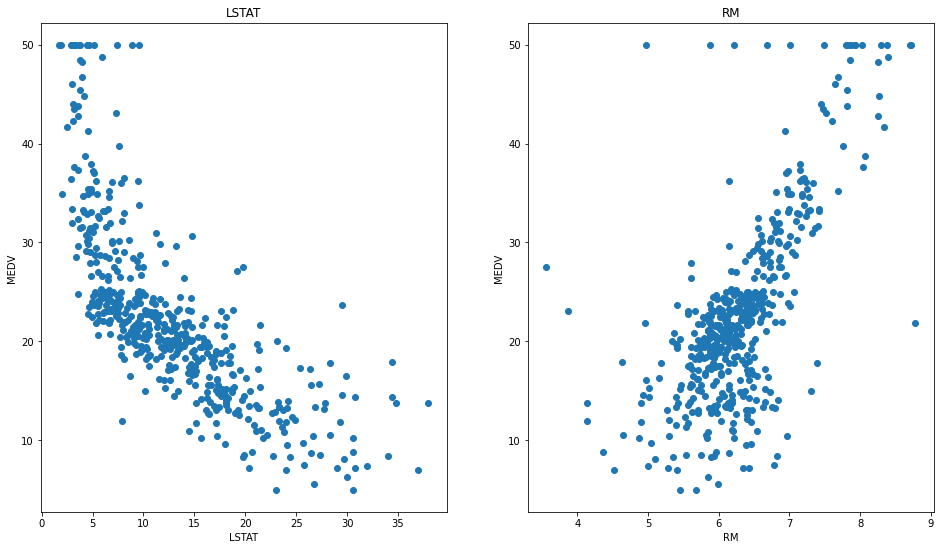

In [ ]:
plt.figure(figsize=(16, 9))
features = ['LSTAT','RM']
for i, col in enumerate(features): 
 plt.subplot(1, 2, i+1)
 x = df[col]
 y = df['MEDV']
 plt.scatter(x, y, marker='o')
 plt.title(col)
 plt.xlabel(col)
 plt.ylabel('MEDV')

## 訓練模型前的準備
切分資料

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

print(X_train.shape) #(404, 2)
print(X_test.shape) #(102, 2)
print(Y_train.shape) #(404, )
print(Y_test.shape) #(102, )

(404, 2)
(102, 2)
(404,)
(102,)


## 訓練模型並進行評估

###訓練 Linear Regression 模型

預測的目標變數資料(X_test)與目標變數的測試資料(Y_test)的R2-score為0.6753556251471672。

(當R2_score越接近1時，代表樣本中預測值和真實值越趨近於相等，表示特徵變數對於目標變數的解釋程度越好。)


In [ ]:
# Modeling
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

LR.fit(X_train, Y_train)

LR.predict(X_test)

print('R2:', LR.score(X_test, Y_test))

R2: 0.6753556251471672


將目標變數資料(X_test)和測試的目標變數資料(Y_test)畫成散佈圖，可以發現兩者關係接近斜直線1。

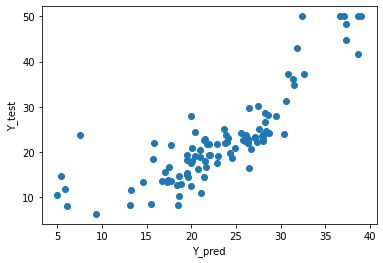

In [ ]:
# plotting the y_test vs y_pred
Y_pred = LR.predict(X_test)
plt.scatter(Y_pred, Y_test)
plt.xlabel('Y_pred')
plt.ylabel('Y_test')
plt.show()

###訓練 Random Forest Regressor 模型

預測的目標變數資料(X_test)與目標變數的測試資料(Y_test)的R2-score為0.7775852965613236，訓練結果的分數大於Linear Regression模型(特徵變數對於目標變數的解釋程度更好)。

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Modeling
RF = RandomForestRegressor(random_state = 1)

RF.fit(X_train, Y_train)

RF.predict(X_test)

print('R2:', RF.score(X_test, Y_test))

R2: 0.7775852965613236


將目標變數資料(X_test)和測試的目標變數資料(Y_test)畫成散佈圖，可以發現兩者關係接近斜直線1。

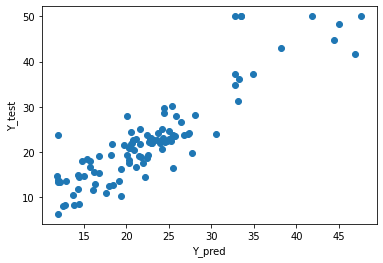

In [ ]:
# plotting the y_test vs y_pred
Y_pred = RF.predict(X_test)
plt.scatter(Y_pred, Y_test)
plt.xlabel('Y_pred')
plt.ylabel('Y_test')
plt.show()

###參數調整

In [ ]:
from sklearn.model_selection import GridSearchCV

使用GridSearchCV函式調整Linear Regression模型的兩項參數:

1.fit_intercept(預設為True，表示有將y軸的截距加入並自動計算出最佳的截距值，如果為False，則迴歸模型線會直接通過原點)

2.copy_X(預設為True，表示X會被Copied，如果為False，則X會被覆蓋掉)

找出參數的最佳值(fit_intercept=False，copy_X=True)，參數優化後的準確率為0.6808081995000028。

In [ ]:
LR_param = {"fit_intercept":[True, False], "copy_X":[True, False]}
    
GSCV = GridSearchCV(LR, param_grid=LR_param, cv=5)
GSCV.fit(X_train, Y_train)
    
print("accuracy score", GSCV.score(X_test, Y_test))
print("The best model param :", GSCV.best_params_)

accuracy score 0.6808081995000028
The best model param : {'copy_X': True, 'fit_intercept': False}


調整Random Forest Regressor模型的四項參數:

1.n_estimators(森林裡樹木的數量，預設為10)

2.max_depth(樹的最大深度，預設為None)

3.min_samples_split(內部節點再劃分所需最小樣本數，預設為2)

4.min_samples_leaf(葉子節點最少樣本數，預設為1)

找出參數的最佳值(n_estimators=500，max_depth=5，min_samples_split=2，min_samples_leaf=10)，參數優化後的準確率為0.8426043881328242。

(分兩次調整參數是因為一次調四個參數的排列組合會太多，會花很多時間。)

In [ ]:
from numpy.ma.core import sqrt
RF_param = {
    "n_estimators":[120,300,500,800,1200], 
    "max_depth":[5,8,15,25,30,None],
    }
    
GSCV = GridSearchCV(RF, param_grid=RF_param, cv=5)
GSCV.fit(X_train, Y_train)
    
print("accuracy score", GSCV.score(X_test, Y_test))
print("The best model param :", GSCV.best_params_)

accuracy score 0.7976469085763005
The best model param : {'max_depth': 5, 'n_estimators': 500}


In [ ]:
RF = RandomForestRegressor(n_estimators=500, max_depth=5, random_state = 1)
RF_param = {
    "min_samples_split":[1,2,5,10,15,100],
    "min_samples_leaf":[1,2,5,10]
    }
    
GSCV = GridSearchCV(RF, param_grid=RF_param, cv=5)
GSCV.fit(X_train, Y_train)
    
print("accuracy score", GSCV.score(X_test, Y_test))
print("The best model param :", GSCV.best_params_)

accuracy score 0.8426043881328242
The best model param : {'min_samples_leaf': 10, 'min_samples_split': 2}


###訓練Support Vector Reggression模型，並調整參數

一、訓練Support Vector Reggression模型，預測的目標變數資料(X_test)與目標變數的測試資料(Y_test)的R2-score為0.7067167946709252。

二、調整兩項參數:

1.C(誤差項的懲罰參數,預設為1)

2.gamma(當kernel爲‘rbf’, ‘poly’或‘sigmoid’時的kernel係數，預設為auto)


三、找出參數的最佳值(C=10，gamma=0.1)，參數優化後的準確率(0.8522739040059868)大於Linear Regression與Random Forest Regressor模型(特徵變數對於目標變數的解釋程度更好)。

四、將目標變數資料(X_test)和測試的目標變數資料(Y_test)畫成散佈圖，可以發現兩者關係接近斜直線1。

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn import svm
SVR = svm.SVR()

SVR.fit(X_train, Y_train)

SVR.predict(X_test)

print('R2:', SVR.score(X_test, Y_test))

R2: 0.7067167946709252


In [ ]:
SVR_param = {"C":[1e0, 1e1, 1e2, 1e3], "gamma":np.logspace(-2, 2, 5)}
    
GSCV = GridSearchCV(SVR, param_grid=SVR_param, cv=5)
GSCV.fit(X_train, Y_train)
    
print("accuracy score", GSCV.score(X_test, Y_test))
print("The best model param :", GSCV.best_params_)

accuracy score 0.8522739040059868
The best model param : {'C': 10.0, 'gamma': 0.1}


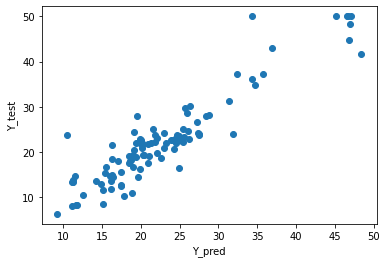

In [ ]:
SVR = svm.SVR(C=10.0, gamma=0.1)

SVR.fit(X_train, Y_train)

Y_pred = SVR.predict(X_test)
plt.scatter(Y_pred, Y_test)
plt.xlabel('Y_pred')
plt.ylabel('Y_test')
plt.show()

In [ ]:
EXECUTION_END_TIME = time.time() # 計算執行時間
print('total execution time: {}'.format(EXECUTION_END_TIME - EXECUTION_START_TIME))

total execution time: 2478.4587495326996


##參考資料

1.https://reurl.cc/n14G12

2.https://www.kaggle.com/code/shreayan98c/boston-house-price-prediction

3.https://www.kaggle.com/code/vikrishnan/house-sales-price-using-regression

4.https://www.kaggle.com/code/prasadperera/the-boston-housing-dataset

5.https://ithelp.ithome.com.tw/articles/10235449

6.https://zhuanlan.zhihu.com/p/89873990

7.https://www.twblogs.net/a/5d3f3ebbbd9eee51fbf903a0

8.https://www.twblogs.net/a/5cce310abd9eee6726c8beb5

9.http://www.taroballz.com/2018/07/14/ML_RandomForest/

10.https://reurl.cc/p14e1l

11.https://pyecontech.com/2019/12/10/regression/

12.https://vimsky.com/zh-tw/article/4469.html

13.https://www.gushiciku.cn/pl/pHfd/zh-tw

14.https://reurl.cc/g2pXMz

15.https://www.cnblogs.com/banshaohuan/p/13308680.html

16.https://www.twblogs.net/a/5eb1574186ec4d36a9b05d71
